#### 1.1 Exploratory data quality (EDL)  

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [111]:
termDepositData = pd.read_csv("bank-full.csv")

In [112]:
termDepositData.shape

(45211, 17)

In [113]:
termDepositData.info() 
# Many columns are objects, we may need to convert them to numbers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [114]:
#Convert object datatype to category
for feature in termDepositData.columns:
    if termDepositData[feature].dtype == 'object':
        termDepositData[feature] = pd.Categorical(termDepositData[feature])
        
termDepositData.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


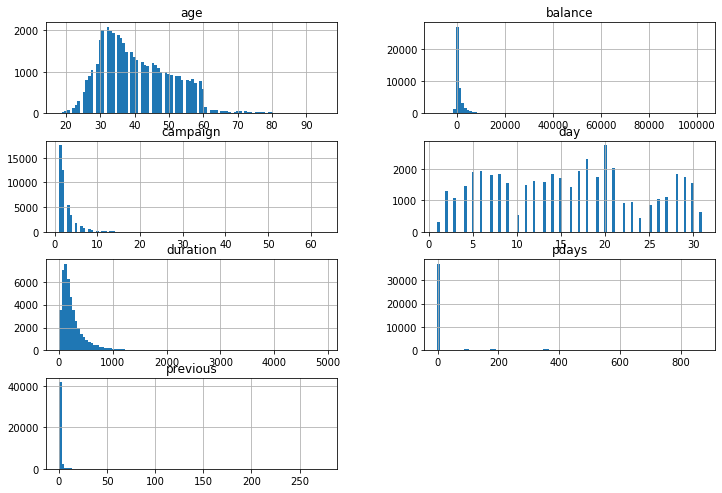

In [115]:
columns = list(termDepositData)[0:-1]  
termDepositData[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [116]:
termDepositData.describe()
# There are some accounts with negative balance - need to decide to drop them or keep them.
# There seems to few outliers with 4918 seconds, but may not be a good idea to drop them.
# We should possibly change -1 in pdays to 900 days to be more appropriate representation for analysis.
# previous also seem to have one of the outlier of 275. We can drop that entry

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [117]:
termDepositData.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [118]:
termDepositData.isnull().values.any()
#There are no null values

False

In [119]:
#Unique Values
for (cName, cData) in termDepositData.iteritems():
    print ("====== Columna Name : ",  cName, "Unique Value :", cData.nunique(), "=====")
    print ("** Value Counts **")
    print (cData.value_counts())
    
# There are 288 Job unknown where we need to do something about. 
# There are 1857 Education unknown where we need to do something about.
# There are 13020 unknown in contacts, may drop contacts all together.
# pdays has 36954 values of -1, investigate it further.


====== Columna Name :  age Unique Value : 77 =====
** Value Counts **
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
====== Columna Name :  job Unique Value : 12 =====
** Value Counts **
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
====== Columna Name :  marital Unique Value : 3 =====
** Value Counts **
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
====== Columna Name :  education Unique Value : 4 =====
** Value Counts **
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
====== Columna Name :  default Unique Value : 2 =====
** Value Counts **
no    

### 1.2 Multivariate Analysis

In [120]:
termDepositData.corr()
# There are no strong co-relation either ways between the following predictor
# Another co-relation done after massaging the data

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### 2 Prepare the Data (Also incudes part of the EDL)

In [121]:
# Let us remove the entries with the negative balance
# Let us also remove the outliers with the previous of 275.
termDepositData.drop(termDepositData[termDepositData.previous > 100].index, inplace=True)
#termDepositData.drop(termDepositData[termDepositData.balance < 0].index, inplace=True)

In [122]:
#Based on the data Convert caegorical to numeric
#One Hot Coding columns
oneHotCols = ["job", "marital"]

#Replace strategy
#education: level have some kind of ranking so putting in that order.
#contact: It makes sense to combin celluar and telephone and assume unknown means we don't have contact.
#poutcome: We more care about the success and for other let us assume that they are not success cateogry.
#pdays: Let us treat -1 as 900 days
replaceStruct = {
    "education": {"unknown":0, "primary": 1, "secondary": 2, "tertiary": 3},
    "default": {"no": 0, "yes": 1},
    "housing": {"no": 0, "yes": 1},
    "loan": {"no": 0, "yes": 1},
    "contact": {"unknown": 0, "cellular": 1, "telephone": 1},
    "poutcome": {"unknown": 0, "failure": 0, "other": 0, "success": 1},
    "Target": {"no": 0, "yes": 1}
}

In [123]:
tData=termDepositData.replace(replaceStruct)
tData=pd.get_dummies(tData, columns=oneHotCols)

In [124]:
#Let us drop day and month as they are not impoart
tData1 = tData.drop(['day', 'month'], axis=1)

In [125]:
#Let us replace -1 to 900 which is more closer represntation. May drop it.
tData1['pdays'].replace([-1], 900, inplace=True)

In [126]:
tData1.head(20)

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,1,0,0,261,1,900,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,1,0,0,151,1,900,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,1,1,0,76,1,900,...,0,0,0,0,0,0,0,0,1,0
3,47,0,0,1506,1,0,0,92,1,900,...,0,0,0,0,0,0,0,0,1,0
4,33,0,0,1,0,0,0,198,1,900,...,0,0,0,0,0,0,1,0,0,1
5,35,3,0,231,1,0,0,139,1,900,...,0,0,0,0,0,0,0,0,1,0
6,28,3,0,447,1,1,0,217,1,900,...,0,0,0,0,0,0,0,0,0,1
7,42,3,1,2,1,0,0,380,1,900,...,0,0,0,0,0,0,0,1,0,0
8,58,1,0,121,1,0,0,50,1,900,...,1,0,0,0,0,0,0,0,1,0
9,43,2,0,593,1,0,0,55,1,900,...,0,0,0,0,1,0,0,0,0,1


In [127]:
tData1.corr()

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
age,1.000000,-0.173615,-0.017880,0.097782,-0.185513,-0.015656,0.020133,-0.004648,0.004760,-0.009949,...,0.447378,-0.008093,-0.065781,-0.197302,-0.068633,0.000412,0.050200,0.164674,0.286261,-0.427820
education,-0.173615,1.000000,-0.009032,0.050580,-0.038714,0.004319,0.129827,0.002545,0.000200,-0.044913,...,-0.104706,0.081921,-0.068275,-0.040603,0.065822,-0.017798,-0.101191,0.005873,-0.126229,0.133022
default,-0.017880,-0.009032,1.000000,-0.066746,-0.006023,0.077233,-0.019931,-0.010020,0.016821,0.040495,...,-0.011291,0.004107,0.000067,-0.016223,-0.003091,0.006470,-0.006670,0.017776,-0.014457,0.003113
balance,0.097782,0.050580,-0.066746,1.000000,-0.068764,-0.084353,0.037335,0.021563,-0.014580,-0.038321,...,0.046899,0.017849,-0.038153,0.001232,-0.016186,0.009022,0.010784,-0.021734,0.025713,-0.012541
housing,-0.185513,-0.038714,-0.006023,-0.068764,1.000000,0.041332,-0.208424,0.005069,-0.023594,-0.036579,...,-0.156630,-0.027315,0.070442,-0.085063,-0.012814,-0.048226,-0.075022,0.001785,0.017665,-0.020463
loan,-0.015656,0.004319,0.077233,-0.084353,0.041332,1.000000,0.007217,-0.012409,0.009977,0.032317,...,-0.014863,-0.007884,0.035572,-0.058505,0.014794,-0.035963,-0.031943,0.016373,0.036914,-0.051722
contact,0.020133,0.129827,-0.019931,0.037335,-0.208424,0.007217,1.000000,0.014374,-0.004850,-0.289290,...,0.036507,0.015361,-0.039179,0.043910,0.038259,0.018467,-0.017227,-0.016899,-0.019353,0.033010
duration,-0.004648,0.002545,-0.010020,0.021563,0.005069,-0.012409,0.014374,1.000000,-0.084568,-0.005280,...,0.026034,0.007384,0.001430,-0.006502,-0.009173,0.020324,-0.006389,0.006103,-0.022689,0.020333
campaign,0.004760,0.000200,0.016821,-0.014580,-0.023594,0.009977,-0.004850,-0.084568,1.000000,0.108111,...,-0.030914,0.005478,-0.004673,-0.021814,0.020737,-0.018449,0.014090,-0.015486,0.031376,-0.023123
pdays,-0.009949,-0.044913,0.040495,-0.038321,-0.036579,0.032317,-0.289290,-0.005280,0.108111,1.000000,...,-0.028031,-0.000897,0.015819,-0.050631,0.004023,0.007268,0.012689,0.005771,0.024147,-0.030333


In [128]:
tData1.corr().filter(['Target'])
#duration, poutcome, contact, previous seems to have positive correlation with Target
#pdays and housing has some negative correlation with Target

,Target
age,0.025154
education,0.051351
default,-0.022420
balance,0.052836
housing,-0.139167
loan,-0.068189
contact,0.150941
duration,0.394525
campaign,-0.073174
pdays,-0.180205


In [129]:
X = tData1.drop("Target" , axis=1)
y = tData1.pop("Target")

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### 3.1 Logistic Regression

In [131]:
# Fit the model on train
modelLogistic = LogisticRegression(solver="liblinear", penalty='l2')
modelLogistic.fit(X_train, y_train)
#predict on test
yPredictLogistic = modelLogistic.predict(X_test)
coef_df = pd.DataFrame(modelLogistic.coef_)
coef_df['intercept'] = modelLogistic.intercept_

In [132]:
modelScoreLogistic = modelLogistic.score(X_test, y_test)
f1ScoreLogistic = f1_score(y_test,yPredictLogistic)
print("Logistic Model Score =", modelScoreLogistic)
print("Logistic F1 Score =", f1ScoreLogistic)

Logistic Model Score = 0.9002433090024331
Logistic F1 Score = 0.4155507559395249


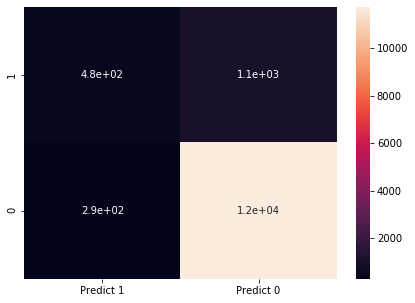

In [133]:
cm=metrics.confusion_matrix(y_test, yPredictLogistic, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### 3.1 Decision Tree

In [134]:
modelDT = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [135]:
print(modelDT.score(X_test, y_test))
yPredictDT = modelDT.predict(X_test)
modelScoreDT = modelDT.score(X_test, y_test)
f1ScoreDT = f1_score(y_test,yPredictDT)
print("DT Model Score =", modelScoreDT)
print("DT F1 Score =", f1ScoreDT)

0.8598392685983927
DT Model Score = 0.8598392685983927
DT F1 Score = 0.414896891351185


DT max_depth = 3 Model Score = 0.9037823490378235
DT max_depth = 3 F1 Score = 0.4396736796908544


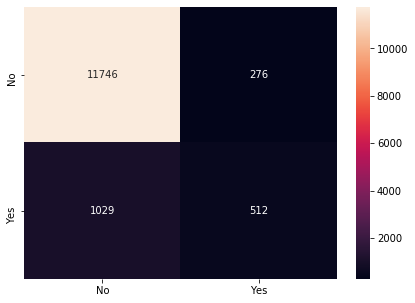

In [136]:
modelDT1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
modelDT1.fit(X_train, y_train)
yPredictDT1 = modelDT1.predict(X_test)
modelScoreDT1 = modelDT1.score(X_test, y_test)
f1ScoreDT1 = f1_score(y_test,yPredictDT1)
print("DT max_depth = 3 Model Score =", modelScoreDT1)
print("DT max_depth = 3 F1 Score =", f1ScoreDT1)

cm=metrics.confusion_matrix(y_test, yPredictDT1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [137]:
train_char_label = ['No', 'Yes']
termDpositFile = open('term_deposit.dot','w')
dot_data = tree.export_graphviz(modelDT1, out_file=termDpositFile, feature_names = list(X_train), class_names = list(train_char_label))
termDpositFile.close()

In [138]:
#Importance of the columns
print (pd.DataFrame(modelDT1.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.052823
education          0.000000
default            0.000000
balance            0.000000
housing            0.000000
loan               0.000000
contact            0.005644
duration           0.601960
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.339573
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.000000


### 3.2 Ensemble Learning - Bagging

In [139]:
from sklearn.ensemble import BaggingClassifier

#modelBagging = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
modelBagging = BaggingClassifier(n_estimators=50,random_state=1)

modelBagging = modelBagging.fit(X_train, y_train)

Ensemble Learning - Bagging Score = 0.8995797389957974
Ensemble Learning - Bagging F1 Score = 0.4396736796908544


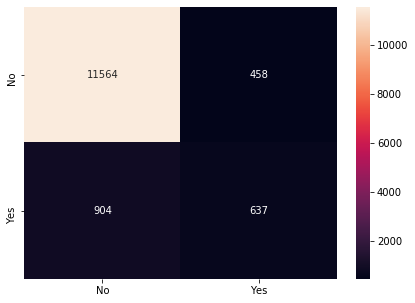

In [140]:
yPredictBagging = modelBagging.predict(X_test)

modelScoreBagging = modelBagging.score(X_test, y_test)
f1ScoreBagging = f1_score(y_test,yPredictDT1)
print("Ensemble Learning - Bagging Score =", modelScoreBagging)
print("Ensemble Learning - Bagging F1 Score =", f1ScoreBagging)

cm=metrics.confusion_matrix(y_test, yPredictBagging,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### 3.2 Ensemble Learning - AdaBoosting

In [141]:
from sklearn.ensemble import AdaBoostClassifier
modelAdaBoosting = AdaBoostClassifier(n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
modelAdaBoosting = modelAdaBoosting.fit(X_train, y_train)

0.9032662390326623
0.46579804560260585
Ensemble Learning - Boosting Score = 0.9032662390326623
Ensemble Learning - Boosting F1 Score = 0.46579804560260585


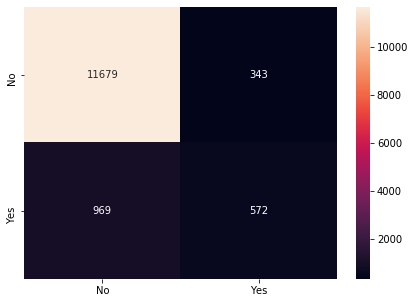

In [142]:
yPredictAdaBoosting = modelAdaBoosting.predict(X_test)
print(modelAdaBoosting.score(X_test , y_test))
print(f1_score(y_test,yPredictAdaBoosting))

modelScoreAdaBoosting = modelAdaBoosting.score(X_test, y_test)
f1ScoreAdaBoosting = f1_score(y_test,yPredictAdaBoosting)
print("Ensemble Learning - Boosting Score =", modelScoreAdaBoosting)
print("Ensemble Learning - Boosting F1 Score =", f1ScoreAdaBoosting)

cm=metrics.confusion_matrix(y_test, yPredictAdaBoosting,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### 3.2 Ensemble RandomForest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=6)
modelRF = modelRF.fit(X_train, y_train)

Ensemble Learning - Random Forest = 0.9048145690481457
Ensemble Learning - Random Forest = 0.48830757035275457


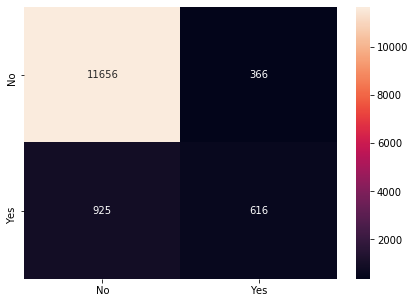

In [144]:
yPredictRF = modelRF.predict(X_test)

modelScoreRF = modelRF.score(X_test, y_test)
f1ScoreRF = f1_score(y_test,yPredictRF)
print("Ensemble Learning - Random Forest =", modelScoreRF)
print("Ensemble Learning - Random Forest =", f1ScoreRF)

cm=metrics.confusion_matrix(y_test, yPredictRF,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### 3.3 Conclusion

In [145]:
print("Logistic Model Score =", modelScoreLogistic)
print("Logistic F1 Score =", f1ScoreLogistic)
print("")
print("DT Model Score =", modelScoreDT)
print("DT F1 Score =", f1ScoreDT)
print("")
print("DT max_depth = 3 Model Score =", modelScoreDT1)
print("DT max_depth = 3 F1 Score =", f1ScoreDT1)
print("")
print("Ensemble Learning - Bagging Score =", modelScoreBagging)
print("Ensemble Learning - Bagging F1 Score =", f1ScoreBagging)
print("")
print("Ensemble Learning - Boosting Score =", modelScoreAdaBoosting)
print("Ensemble Learning - Boosting F1 Score =", f1ScoreAdaBoosting)
print("")
print("Ensemble Learning - Random Forest Score =", modelScoreRF)
print("Ensemble Learning - Random Forest F1 Score =", f1ScoreRF)

Logistic Model Score = 0.9002433090024331
Logistic F1 Score = 0.4155507559395249

DT Model Score = 0.8598392685983927
DT F1 Score = 0.414896891351185

DT max_depth = 3 Model Score = 0.9037823490378235
DT max_depth = 3 F1 Score = 0.4396736796908544

Ensemble Learning - Bagging Score = 0.8995797389957974
Ensemble Learning - Bagging F1 Score = 0.4396736796908544

Ensemble Learning - Boosting Score = 0.9032662390326623
Ensemble Learning - Boosting F1 Score = 0.46579804560260585

Ensemble Learning - Random Forest Score = 0.9048145690481457
Ensemble Learning - Random Forest F1 Score = 0.48830757035275457


### Based on the findings from the different models, I would recommend picking Random Forest algorithm. I would pick Random Forest bacause it has best model score and best F1 score out all the models